## Lets Play Cricket - IPL
1. As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
2. Suggest teams or players a company should endorse for its products.
3. Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

I have used the following packages for visualisations:

1. Matplotlib
2. Seaborn
3. Plotly
4. Pandas
5. Numpy 

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

#### Loading both the datasets

In [3]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [23]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [9]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

#### From this information we got to know that -
1. city, winner, player_of_match, umpire1, umpire2, umpire 3 has missing values in Matches dataset
2. player_dismissed, dismisaal_kind, fielder has missing values in Deliveries Dataset


#### Cleaning and Transformations

In [10]:
matches[matches.city.isnull()][['city','venue']]

,city,venue
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
466,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
474,NaN,Dubai International Cricket Stadium
476,NaN,Dubai International Cricket Stadium


In [11]:
matches.city = matches.city.fillna('Dubai') #filling the Nanvalues with city as Dubai

In [19]:
matches.fillna(0, inplace=True)

In [17]:
deliveries.fillna(0,inplace=True)

### Analysis of the data

In [28]:
print('Total Matches Played: ', matches.shape[0])
print('\n Teams: ', matches['team1'].unique())
print('\n Total venues played at:',matches['city'].nunique())
print('\n Venues Played in: ', matches['city'].unique())


Total Matches Played:  756

 Teams:  ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']

 Total venues played at: 33

 Venues Played in:  ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' 'Dubai'
 'Mohali' 'Bengaluru']


In [29]:
print((matches['player_of_match'].value_counts()).idxmax(),' : has most man of the match awards')
print(((matches['winner']).value_counts()).idxmax(),': has the highest number of match wins')

CH Gayle  : has most man of the match awards
Mumbai Indians : has the highest number of match wins


#### City has 33 distinct values while we have 35 venues. Let's find out venues grouped by cities to see which cities have multiple venues


In [4]:
city_venue = matches.groupby(['city','venue']).count()['season']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df

season
city           venue                                                     
Abu Dhabi      Sheikh Zayed Stadium                                     7
Ahmedabad      Sardar Patel Stadium, Motera                            12
Bangalore      M Chinnaswamy Stadium                                   66
Bengaluru      M Chinnaswamy Stadium                                    7
               M. Chinnaswamy Stadium                                   7
Bloemfontein   OUTsurance Oval                                          2
Cape Town      Newlands                                                 7
Centurion      SuperSport Park                                         12
Chandigarh     Punjab Cricket Association IS Bindra Stadium, M...      11
               Punjab Cricket Association Stadium, Mohali              35
Chennai        M. A. Chidambaram Stadium                                8
               MA Chidambaram Stadium, Chepauk                         49
Cuttack        Barabati Stadium                                         7
Delhi          Feroz Shah Kotla                                        67
               Feroz Shah Kotla Ground                                  7
Dharamsala     Himachal Pradesh Cricket Association Stadium             9
Durban         Kingsmead                                               15
East London    Buffalo Park                                             3
Hyderabad      Rajiv Gandhi International Stadium, Uppal               56
               Rajiv Gandhi Intl. Cricket Stadium                       8
Indore         Holkar Cricket Stadium                                   9
Jaipur         Sawai Mansingh Stadium                                  47
Johannesburg   New Wanderers Stadium                                    8
Kanpur         Green Park                                               4
Kimberley      De Beers Diamond Oval                                    3
Kochi          Nehru Stadium                                            5
Kolkata        Eden Gardens                                            77
Mohali         IS Bindra Stadium                                        7
               Punjab Cricket Association IS Bindra Stadium, M...       3
Mumbai         Brabourne Stadium                                       11
               Dr DY Patil Sports Academy                              17
               Wankhede Stadium                                        73
Nagpur         Vidarbha Cricket Association Stadium, Jamtha             3
Port Elizabeth St George's Park                                         7
Pune           Maharashtra Cricket Association Stadium                 21
               Subrata Roy Sahara Stadium                              17
Raipur         Shaheed Veer Narayan Singh International Stadium         6
Rajkot         Saurashtra Cricket Association Stadium                  10
Ranchi         JSCA International Stadium Complex                       7
Sharjah        Sharjah Cricket Stadium                                  6
Visakhapatnam  ACA-VDCA Stadium                                         2
               Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...      11

### Obsrvations
1. Bangalore and Bengaluru are the same city having the same stadium but are still added in the dataset.
2. Mumbai has 3 stadiums used in IPL
3. Pune has 2 venues used in IPL

## Lets Play more cricket and explore its data

#### Representation of venues in each city

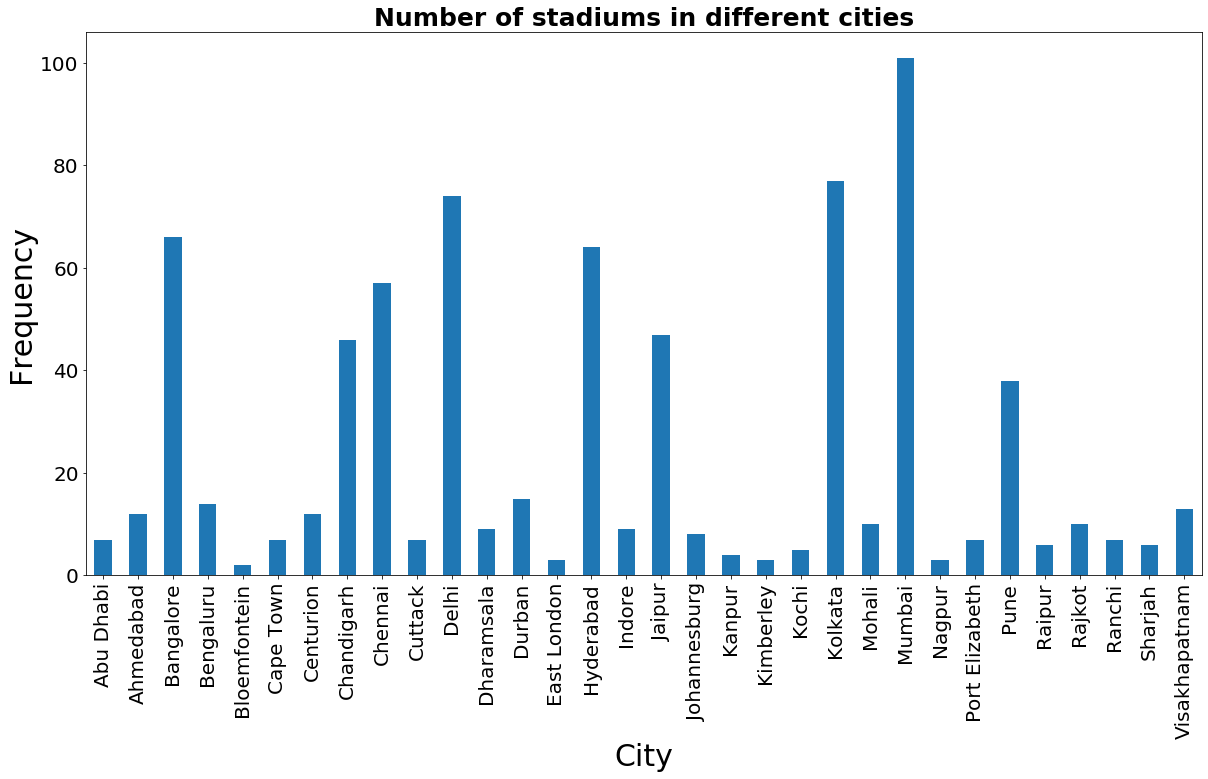

In [14]:
v = pd.crosstab(matches['city'],matches['venue'])
v.replace(v[v!=0],1, inplace = True)

v['count'] = v.sum(axis = 'columns')
b = v['count']



plt.figure(figsize = (20,10))
b.plot(kind = 'bar')
plt.title("Number of stadiums in different cities", fontsize = 25, fontweight = 'bold')
plt.xlabel("City", size = 30)
plt.ylabel("Frequency", size = 30)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#### Number of matches played in every season

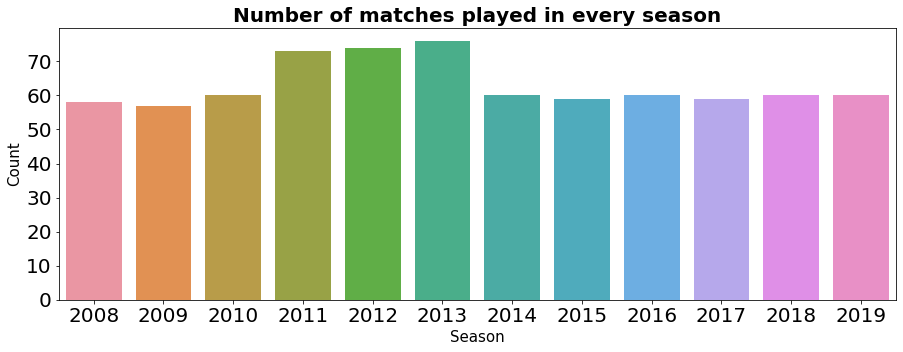

In [12]:
plt.figure(figsize=(15,5))
sns.countplot('season',data = matches)
plt.title("Number of matches played in every season",fontsize=20,fontweight="bold")
plt.ylabel("Count",size=15)
plt.xlabel("Season",size=15)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

From 2011-2013 have more matches than other seasons.

#### Teams played in each Season

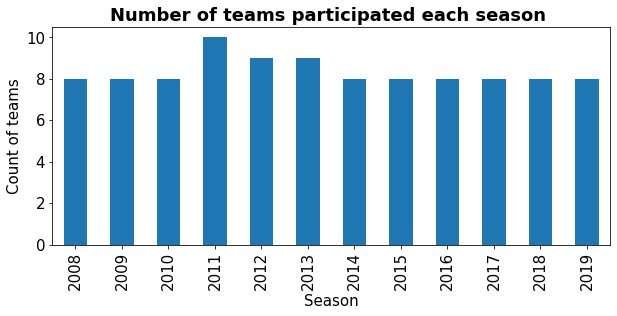

In [11]:
matches.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(10,4))
plt.title("Number of teams participated each season ",fontsize=18,fontweight="bold")
plt.ylabel("Count of teams", size = 15)
plt.xlabel("Season", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

2011, 2012 and 2013 have more teams as compared to other season which explains us more number of matches.

#### Venues which hosted most number of IPL matches

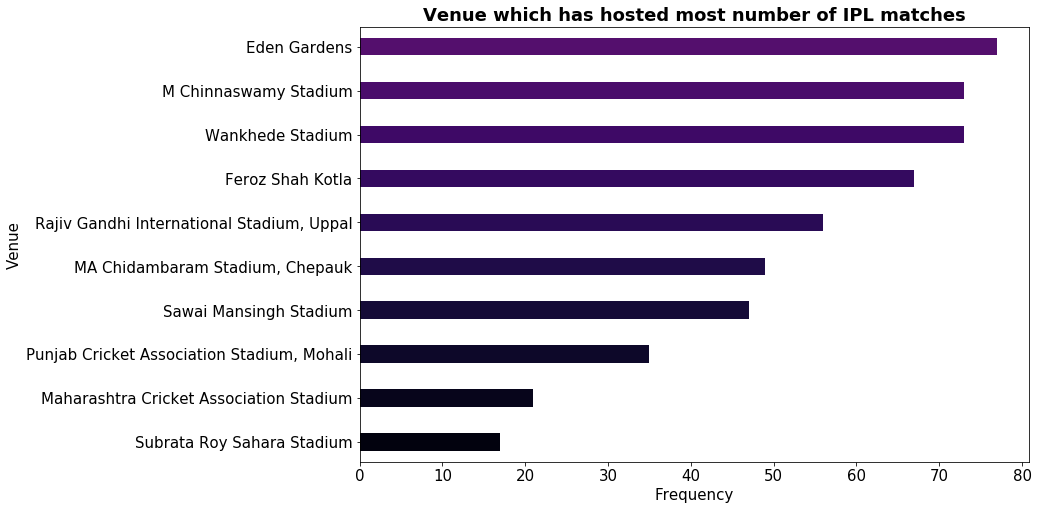

In [24]:
matches.venue.value_counts().sort_values(ascending = True).tail(10).plot(kind = 'barh',figsize=(12,8),width = 0.4, fontsize=15,color=sns.color_palette('inferno',40))
plt.title("Venue which has hosted most number of IPL matches",fontsize=18,fontweight="bold")
plt.ylabel("Venue", size = 15)
plt.xlabel("Frequency", size = 15)
plt.show()

This shows that Eden garden hostel maximum number of matches followed by M Chinnaswamy Stadium and Wankhede Stadium.

#### Runs across each Season

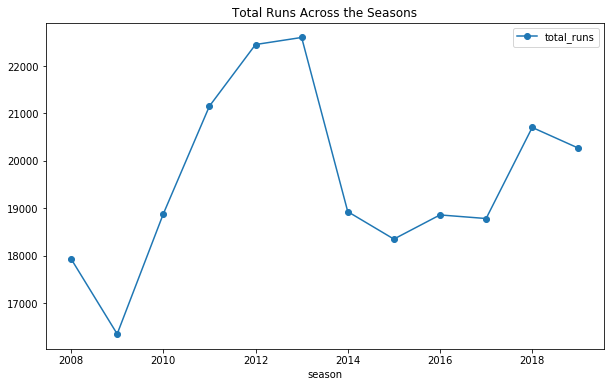

In [13]:
batsman = matches[['id','season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
season=batsman.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='o')
plt.gcf().set_size_inches(10,6)
plt.title('Total Runs Across the Seasons')
plt.show()

There was a decline in runs across the season from 2008 to 2009 and there was a good increase in runs from 2009 to 2013.

#### Toss Decisions across Seasons

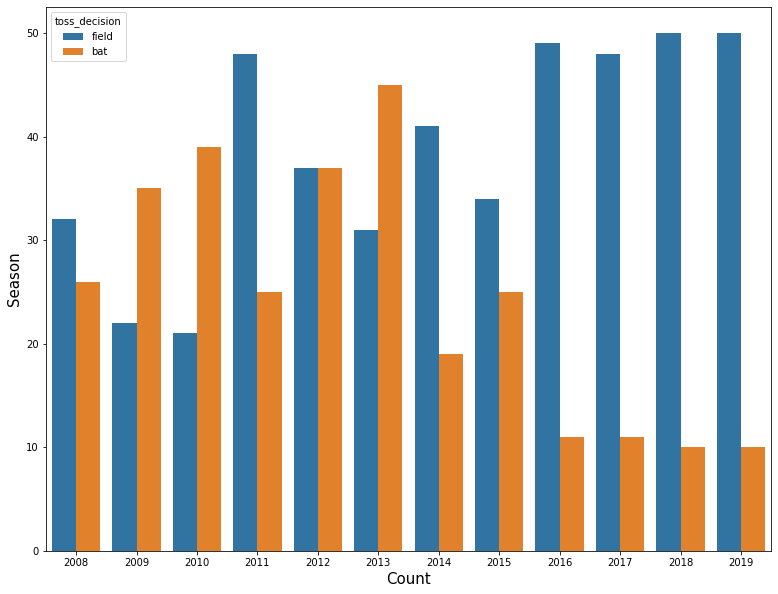

In [39]:
plt.subplots(figsize=(13,10))
sns.countplot(x='season',hue='toss_decision',data=matches)
plt.ylabel("Season", size = 15)
plt.xlabel("Count", size = 15)
plt.show()

The decision for batting or fielding varies largely across the seasons. In some seasons, the probablity that toss winners opt for batting is high, while it is not the case in other seasons. In 2016-2019 though, the majority of toss winners opted for fielding.

#### Maximum Toss Winners

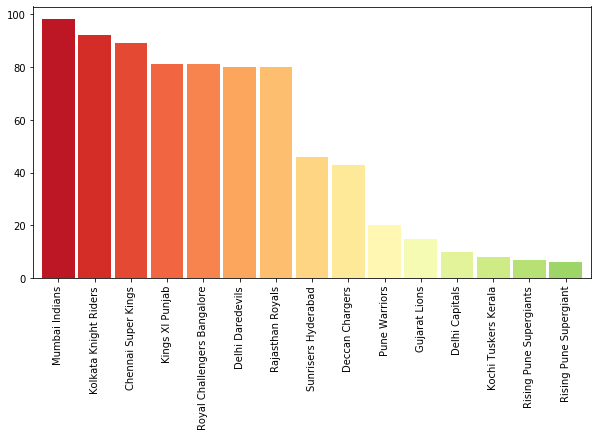

In [40]:
plt.subplots(figsize=(10,5))
a = matches['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
plt.show()

Mumbai Indians have maximum toss winners followed by Kolkata Knight Riders. Pune Supergiants have the lowest toss winners as they have played less matches in all over the seaons. This is not equally divided as all teams have not played equal number matches in all seasons

#### What does toss winner choose after winning- Bat Or field?

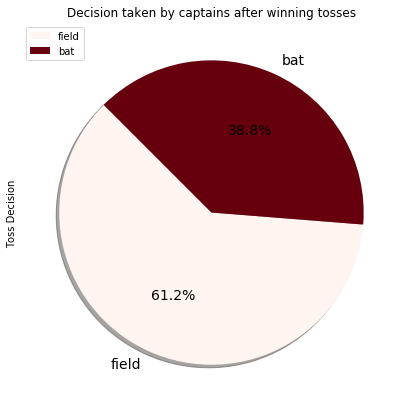

In [48]:
matches['toss_decision'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,7), shadow=True, startangle=135, legend=True, cmap='Reds')

plt.ylabel('Toss Decision')
plt.title('Decision taken by captains after winning tosses')
plt.show()

After winning the toss 61% of the captain choose to bowl in the matches. The teams choose to chase down.

#### How toss decision affects match results?

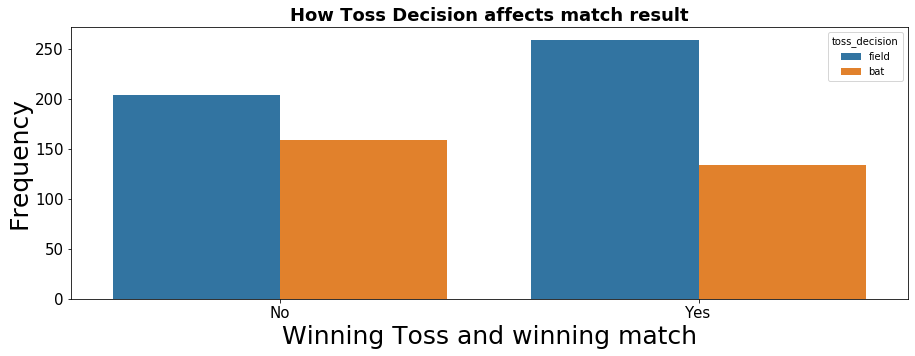

In [82]:
matches['toss_win_game_win'] = np.where((matches.toss_winner == matches.winner),'Yes','No')
plt.figure(figsize = (15,5))
sns.countplot('toss_win_game_win', data=matches, hue = 'toss_decision')
plt.title("How Toss Decision affects match result", fontsize=18,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Winning Toss and winning match", fontsize = 25)
plt.ylabel("Frequency", fontsize = 25)
plt.show()

Teams winning tosses and electng to field first have won most number of times.

#### Individual teams decision to choose bat or field after winning toss

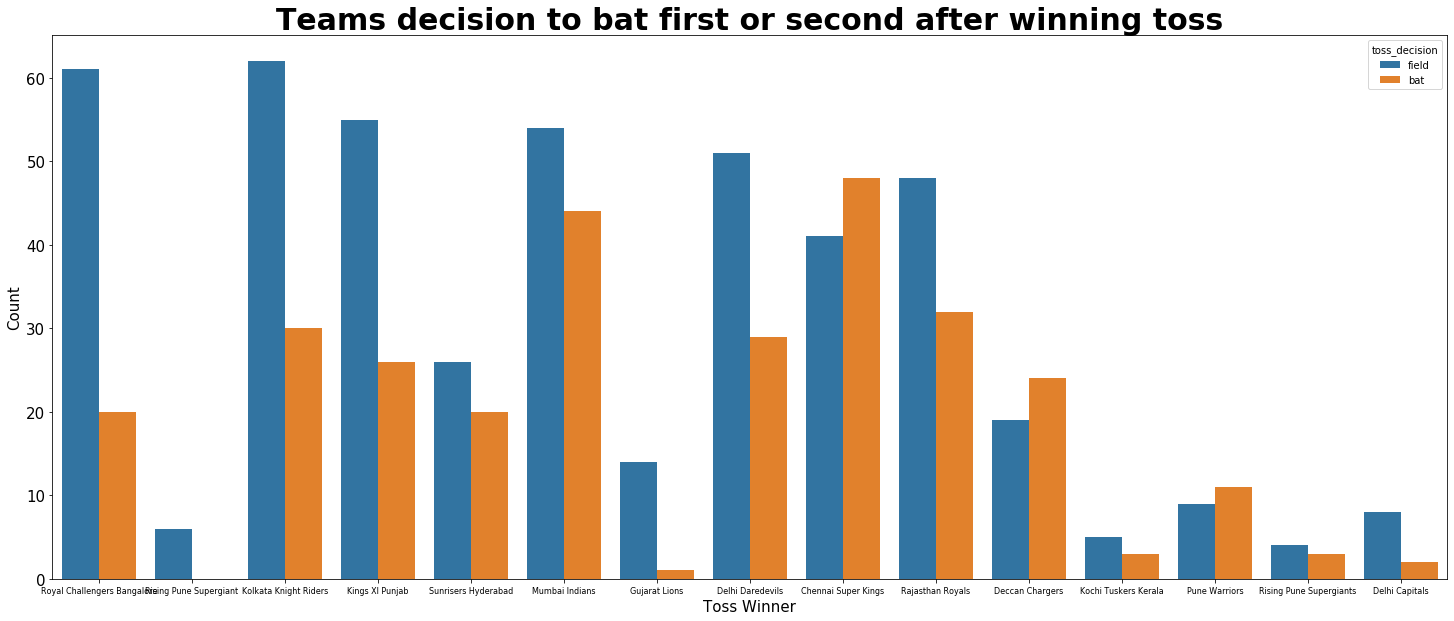

In [53]:
plt.figure(figsize = (25,10))
sns.countplot('toss_winner', data = matches, hue = 'toss_decision')
plt.title("Teams decision to bat first or second after winning toss", size = 30, fontweight = 'bold')
plt.xticks(size = 8)
plt.yticks(size = 15)
plt.xlabel("Toss Winner", size = 15)
plt.ylabel("Count", size = 15)
plt.show()

#### Top players with maximum MOM and led to teams victory.

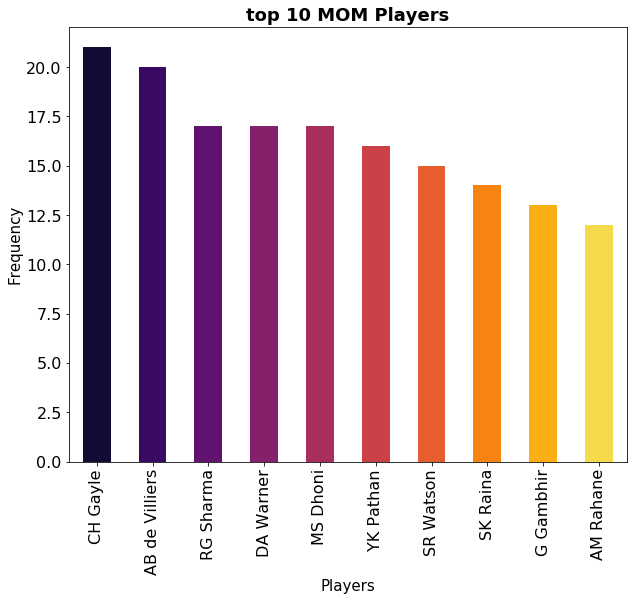

In [55]:
MOM = matches['player_of_match'].value_counts()
MOM.head(10).plot(kind = 'bar', figsize=(10,8), fontsize=16, color = sns.color_palette('inferno',10))
plt.title("top 10 MOM Players", fontsize = 18, fontweight='bold')
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Players', fontsize=15)
plt.show()

Chris gayle has won the maximum MOM.

#### How winning matches by fielding first varies across venues?

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



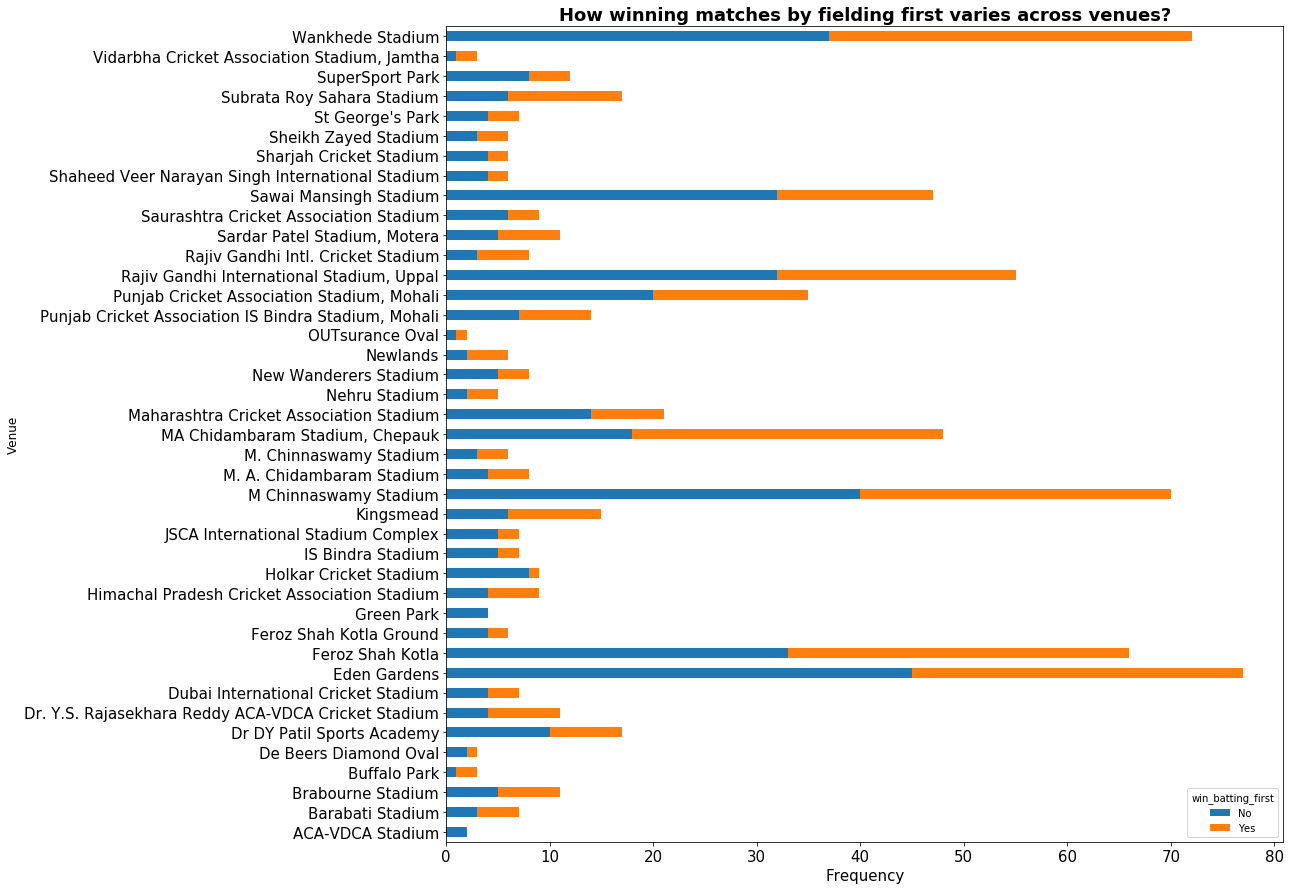

In [57]:
new_matches = matches[matches['result'] == 'normal']   #taking all those matches where result is normal and creating a new dataframe
new_matches['win_batting_first'] = np.where((new_matches.win_by_runs > 0), 'Yes', 'No')
new_matches.groupby('venue')['win_batting_first'].value_counts().unstack().plot(kind = 'barh', stacked = True,
                                                                               figsize=(15,15))
plt.title("How winning matches by fielding first varies across venues?", fontsize=18,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Frequency", fontsize = 15)
plt.ylabel("Venue", fontsize = 12)
plt.show()

I have observed that batting second on mostly all venues were in advantage.

#### Teams scoring 200+runs in a match


In [63]:
high_scores=deliveries.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
high_scores=high_scores[high_scores['total_runs']>=200]
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,Royal Challengers Bangalore,Pune Warriors,263
1370,7937,1,Kolkata Knight Riders,Kings XI Punjab,250
1250,620,1,Royal Challengers Bangalore,Gujarat Lions,248
416,206,1,Chennai Super Kings,Rajasthan Royals,246
1498,11338,1,Kolkata Knight Riders,Mumbai Indians,241
122,61,1,Chennai Super Kings,Kings XI Punjab,240
1134,562,1,Royal Challengers Bangalore,Mumbai Indians,235
1426,11147,1,Sunrisers Hyderabad,Royal Challengers Bangalore,233
596,296,1,Kings XI Punjab,Royal Challengers Bangalore,232
1500,11339,1,Sunrisers Hyderabad,Kings XI Punjab,232


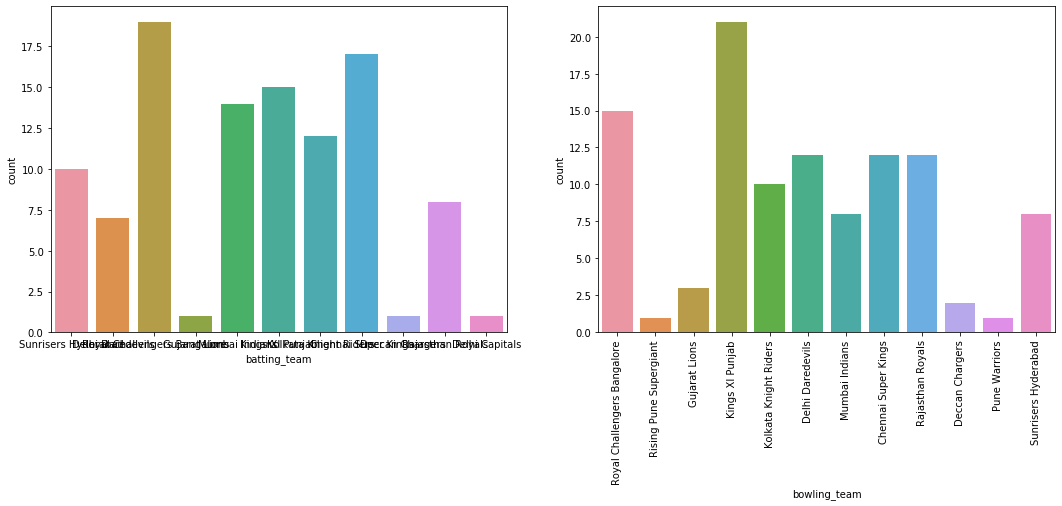

In [68]:
fig, ax =plt.subplots(1,2)
sns.countplot(high_scores['batting_team'],ax=ax[0])
sns.countplot(high_scores['bowling_team'],ax=ax[1])
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

The graph on the left shows the number of times a team has scored above 200 runs. The graph on the right shows the number of times a bowling team has conceeded above 200 runs.

#### Top 10 Batsman

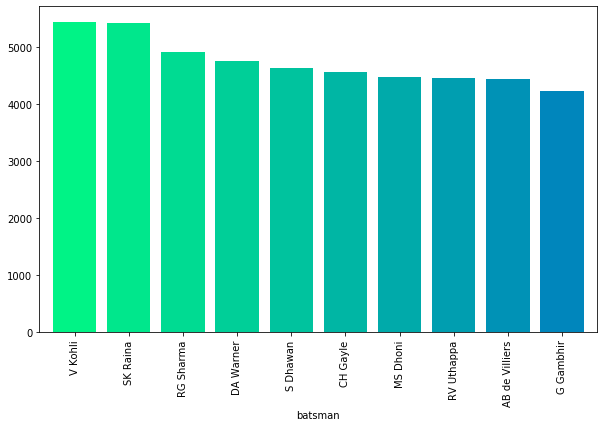

In [69]:
plt.subplots(figsize=(10,6))
max_runs=deliveries.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('winter_r',20))
plt.show()

Virat Kolhi has scored the maximum runs and Raina is just behind him just by few runs.

#### Top Individual Scores

In [70]:
top_scores = deliveries.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
top_scores.sort_values('batsman_runs', ascending=0).head(10)
top_scores.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,Royal Challengers Bangalore,175
900,60,BB McCullum,Kolkata Knight Riders,158
8426,562,AB de Villiers,Royal Challengers Bangalore,133
10149,7935,RR Pant,Delhi Daredevils,130
9257,620,AB de Villiers,Royal Challengers Bangalore,129
5585,372,CH Gayle,Royal Challengers Bangalore,128
3135,206,M Vijay,Chennai Super Kings,127
529,36,DA Warner,Sunrisers Hyderabad,126
7752,516,V Sehwag,Kings XI Punjab,122
10417,7953,SR Watson,Chennai Super Kings,121


Chris gayle has scored 175 runs in 2013 and CH gayle along with ABD Villiers have bagged two times in top individual scores

#### Frequency of Scores

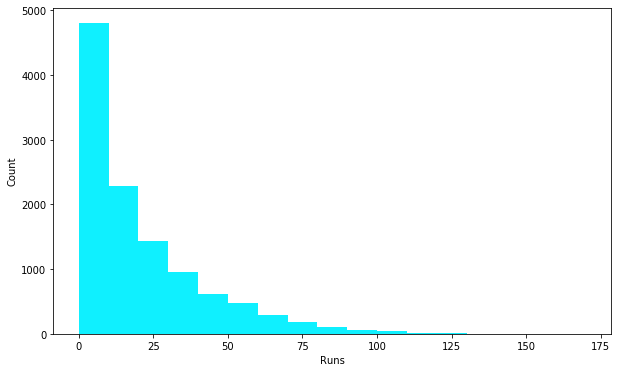

In [71]:
plt.subplots(figsize=(10,6))
bins=range(0,180,10)
plt.hist(top_scores["batsman_runs"],bins,histtype="bar",rwidth=1.2,color='#0ff0ff')
plt.xlabel('Runs')
plt.ylabel('Count')
plt.plot()
plt.show()

The average score for a batsman is around 19-20. Also the number of single digit score is highest and the number of centuries is low.

## Top bowlers
#### Highest Wicket Taker in IPL

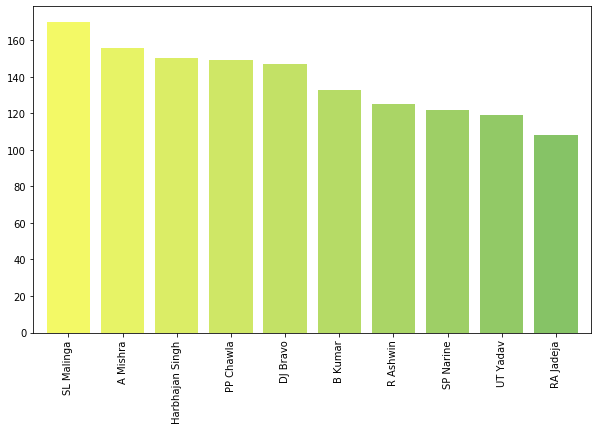

In [72]:
plt.subplots(figsize=(10,6))
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
ct=deliveries[deliveries["dismissal_kind"].isin(dismissal_kinds)]
ax=ct['bowler'].value_counts()[:10].plot.bar(width=0.8,color=sns.color_palette('summer_r',20))
plt.show()

1. Malinga is the highest wicket taker because he has a different bowling action which makes him unique in his ways. He bowls seam based swing. 
2. In top 10 bowlers, 6 bowlers are spinners and rest are seam based swing bowlers.
3. All pacers are right arm whereas spinners are left and right arm leg and off spinners

#### Maximum Overs

In [74]:
eco=deliveries.groupby(['bowler']).sum()
eco['total balls']=deliveries['bowler'].value_counts()
eco['overs']=(eco['total balls']//6)
eco[eco['overs']>200].sort_values(by='overs',ascending=0)['overs'].head(5).reset_index()

,bowler,overs
0,Harbhajan Singh,575
1,A Mishra,528
2,PP Chawla,526
3,R Ashwin,502
4,SL Malinga,495


Harbhajan Singh has the maximum number of bowlers in all seasons i.e 575 overs

#### Bowlers with maximum number of extras.

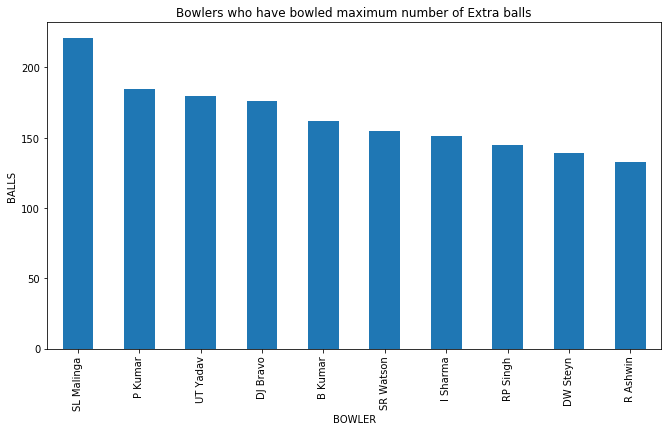

,SL Malinga,P Kumar,UT Yadav,DJ Bravo,B Kumar,SR Watson,I Sharma,RP Singh,DW Steyn,R Ashwin
bowler,221,185,180,176,162,155,151,145,139,133


In [78]:
extra = deliveries[deliveries['extra_runs']!=0]['bowler'].value_counts()[:10]
extra.plot(kind='bar', figsize=(11,6), title='Bowlers who have bowled maximum number of Extra balls')

plt.xlabel('BOWLER')
plt.ylabel('BALLS')
plt.show()

extra = pd.DataFrame(extra)
extra.T

#### How to win Finals??
First let us see which teams have played and won the maximum finals

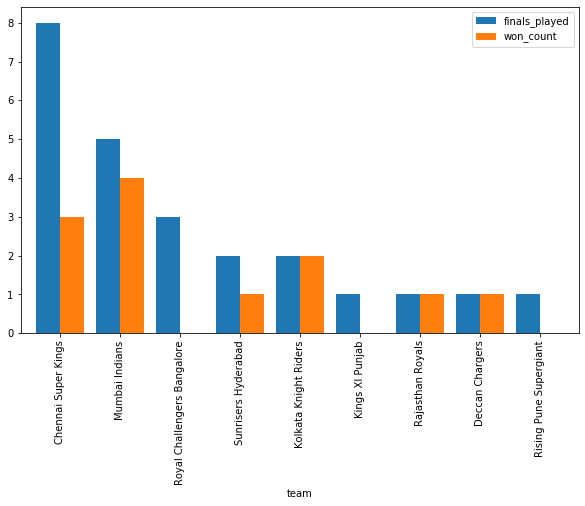

In [80]:
finals=matches.drop_duplicates(subset=['season'],keep='last')
finals=finals[['id','season','city','team1','team2','toss_winner','toss_decision','winner']]
most_finals=pd.concat([finals['team1'],finals['team2']]).value_counts().reset_index()
most_finals.rename({'index':'team',0:'count'},axis=1,inplace=True)
xyz=finals['winner'].value_counts().reset_index()
most_finals=most_finals.merge(xyz,left_on='team',right_on='index',how='outer')
most_finals=most_finals.replace(np.NaN,0)
most_finals.drop('index',axis=1,inplace=True)
most_finals.set_index('team',inplace=True)
most_finals.rename({'count':'finals_played','winner':'won_count'},inplace=True,axis=1)
most_finals.plot.bar(width=0.8)
plt.gcf().set_size_inches(10,6)
plt.show()

CSK has played 8 IPL finals(but could win only 2 :( ) followed by MI with 5. CSK,MI,KKR have won 3,5,2 titles each respectively. Sadly RCB have never won a final even with 3 apperances.

Looking at the graph we can say that next year too CSK has a high chance of featuring in the finals as it has featured in 8 out of their 8 seasons played.

### Q1. As a sports analysts, The most successful teams, players & factors contributing win or loss of a team:

1. Mumbai Indians is the most successful team in IPL and has won the most number of toss.
2. There were more matches won by chasing the total(419 matches) than defending(350 matches).
3. The Mumbai city has hosted the most number of IPL matches.
4. Chris Gayle has won the maximum number of player of the match title.
5. Eden Gardens has hosted the maximum number of IPL matches.
6. If a team wins a toss choose to field first as it has highest probablity of winning

### Q2. Teams or Players a company should endorse for its products.

1. If the franchise is looking for a consistant batsman who needs to score good amount of runs then go for V Kohli, S Raina, Rohit Sharma , David Warner.
2. If the franchise is looking for a game changing batsman then go for Chris Gayle, AB deVillers, R Sharma , MS Dhoni...
3. If the franchise is looking for a batsman who could score good amount of runs every match the go for DA Warner, CH Gayle, V Kohli,AB de Villiers,S Dhawan
4. If the franchise needs the best finisher in lower order having good strike rate then go for CH Gayle,KA Pollard, DA Warner,SR Watson,BB McCullum
5. If the franchise need a experienced bowler then go for Harbhajan Singh ,A Mishra,PP Chawla ,R Ashwin,SL Malinga,DJ Bravo6. 
6. If the franchise need a wicket taking bowler then go for SL Malinga,DJ Bravo,A Mishra ,Harbhajan Singh, PP Chawla
